<div style="font-weight:bold;font-size:30px;margin-bottom:-5px">Labs Submission 2: Optimization</div>

*submitted by: Lixiao Hu, Moritz Raykowski and Robin Reiners*

---

<p style="font-weight: bold">Table of Content:</p>

* [Problem Definition 1: Gradient descent](#gradient-decent)
    * [1. Question](#1-1)
    * [2. Question](#1-2)
    * [3. Question](#1-3)
    * [4. Question](#1-4)
* [Problem Definition 2: Ordinary least squares](#ordinary-least-squares)
    * [1. Question](#2-1)
    * [2. Question](#2-2)
    * [3. Question](#2-3)
    * [4. Question](#2-4)
    * [5. Question](#2-5)
    * [6. Question](#2-6)
    * [7. Question](#2-7)
---

<a id='gradient-decent'></a> <p style="text-decoration: underline; font-style: italic; font-size:24px">Problem Definition 1: Gradient descent</p>

In this exercise, we use gradient descent to find the minimum of $$f(\theta)=(\theta-2)^2+5$$. You can define and plot the function $f$ with

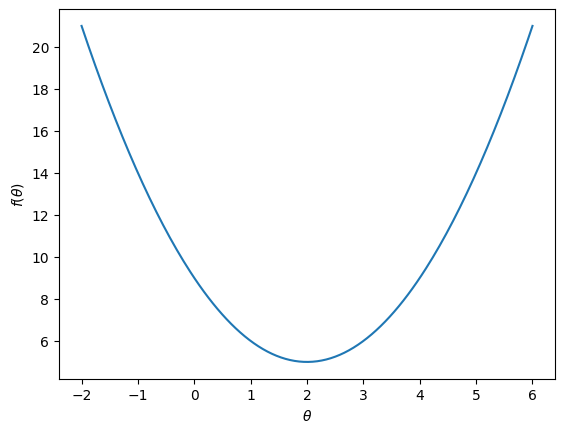

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Display the plot centered within the cell
display(HTML("<style>.output { display: flex; justify-content: center; }</style>"))

import sympy as sym

# Define the symbol 'theta'
theta = sym.Symbol('theta')

# Define the function
f = (theta - 2)**2 + 5

# Convert the SymPy expression to a NumPy-compatible function
f_np = sym.lambdify(theta, f, 'numpy')

# Generate a range of values for theta
x = np.linspace(-2, 6, 200)

# Plot the function
plt.plot(x, f_np(x))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.show()

<p style="text-decoration: underline" id='1-1'>(Gradient descent) Lab-Question 1:</p>

*What’s the gradient of our function $f$? Define a gradient function $g$ and plot it*

---

To calculate the derivative of the given function $f(\theta) = (\theta - 2)^2 + 5$ with respect to $\theta$, we can simply apply the power rule of differentiation:
$$\frac{d}{d \theta} f(\theta)=2\theta-4$$
Here's the Python code to calculate the derivative using SymPy library:


In [149]:
f.diff(theta)

2*theta - 4

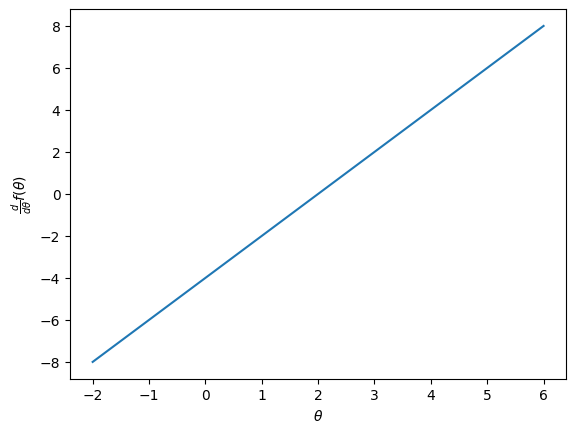

In [327]:
f_diff = sym.lambdify(theta, f.diff(theta), 'numpy')

# Generate a range of values for theta
x = np.linspace(-2, 6, 200)

# Plot the function
plt.plot(x, f_diff(x))
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\frac{d}{d \theta} f(\theta)$')
plt.show()

<p style="text-decoration: underline" id='1-2'>(Gradient descent) Lab-Question 2:</p>

*Assume a constant learning rate of $λ = 0.8$. Write down the general update step for gradient descent*

---

The general update step for gradient descent with a constant learning rate of $\lambda$ is given by: $$\theta_{n+1}=\theta_n-\lambda \nabla f\left(\theta_n\right)$$ where $\theta_n$ is the value of the parameter at iteration $n$, $\nabla f(\theta_n)$ is the gradient of the function $f$ evaluated at $\theta_n$, and $\lambda$ is the learning rate.


For the specific function $f(\theta) = (\theta - 2)^2 + 5$, the gradient is given by:$$\theta_{n+1}=\theta_n-0.8(2\theta_n - 4)$$ which simplifies to:$$\theta_{n+1}=-0.6\theta_n +3.2$$

In [150]:
theta - 0.8*sym.diff(f, theta)

3.2 - 0.6*theta

<p style="text-decoration: underline" id='1-3'>(Gradient descent) Lab-Question 3:</p>

*Implement gradient descent for minimizing $f$ making use of your defined gradient function $g$. Compute 20 iterations to find the $θ$ that minimizes $f(θ)$. Plot the sequence of $θ_{t}s$ against the iteration $t$. Start with $θ_{0} = 5$*

---

In the following code, we implement the gradient descent algorithm for minimizing a given function $f$ with respect to a parameter $θ$. The algorithm uses a defined gradient function $g$ to compute the gradient of $f$ at each iteration, and updates the parameter value by taking a step in the opposite direction of the gradient with a learning rate $\lambda$.

To visualize the gradient descent process, we create a PrettyTable to show the parameter value $θ$, gradient $g$, and new parameter value $θ_{new}$ at each iteration. We also plot the function $f(θ)$ and the path taken by gradient descent in the same plot.

To use the code, simply define function $f$ and call the visualize_gradient_descent function with appropriate arguments for $x_{0}$, learning_rate, and n_iter. Additionally, if the gradient of $f$ cannot be easily calculated, you can set approx=True to use a numerical approximation instead.

In [306]:
def gradient_decent(f, x0:float, learning_rate:float, n_iter:int, approx=False, visualize=True) -> None:
    """
    A function to visualize gradient descent for a given function.

    Parameters:
    f (function): A function to optimize using gradient descent.
    x0 (float): The initial value of the parameter.
    learning_rate (float): The learning rate for gradient descent.
    n_iter (int): The number of iterations for gradient descent.
    approx (bool): Whether to use numerical approximation for the gradient.
    visualize (bool): Weher to plot the visualization or not

    Returns: None
    """
    # Initialize the rows for the table
    col_labels=["Iteration", "θ", "Gradient", "θ_new"]
    rows=[]
    
    # Convert the function to a NumPy-compatible function
    f_np = np.vectorize(f)

    # Define the derivative of the function using SymPy
    x = sym.Symbol('θ')
    f_sym = sym.Lambda(x, f(x))
    derivative = sym.lambdify(x, sym.diff(f_sym(x), x), 'numpy')

    # Initialize arrays to store the parameter values and function values at each iteration
    x_vals = [x0]
    f_vals = [f_np(x0)]

    
    # Perform gradient descent
    for i in range(n_iter):
        # Compute the gradient of the function at the current parameter value
        if approx:
            h = 1e-6
            grad = (f(x_vals[-1] + h) - f(x_vals[-1] - h)) / (2 * h)
        else: 
            grad = derivative(x_vals[-1])
            
        # Update the parameter value using the gradient and learning rate
        x_new = x_vals[-1] - learning_rate * grad
        # Store the new parameter value and function value
        x_vals.append(x_new)
        f_vals.append(f_np(x_new))
        # add results to table
        rows.append([
            i+1,
            "{:10.3f}".format(x_vals[i]),
            "{:10.3f}".format(grad),
            "{:10.3f}".format(x_vals[i+1])
        ])
    if visualize:
        # Plot the function and the path taken by gradient descent
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
        fig.suptitle(r'Gradient Descent Visualization for $f(\theta)=%s$' % sym.latex(f_sym(x)))
            
        x_range = np.linspace(-2, 6, 100)
        ax1.plot(x_range, f_np(x_range), color='gray', linestyle='--')
        ax1.plot(x_vals, f_vals, marker='o')
        ax1.set_xlim(-2, 6)
        ax1.set_xlabel(r'$\theta$')
        ax1.set_ylabel(r'$f(\theta)$')
                
        table = ax2.table(cellText=rows, colLabels=col_labels, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)
        ax2.axis('off')

here is the results for $f(\theta)=(\theta - 2)^{2} + 5$

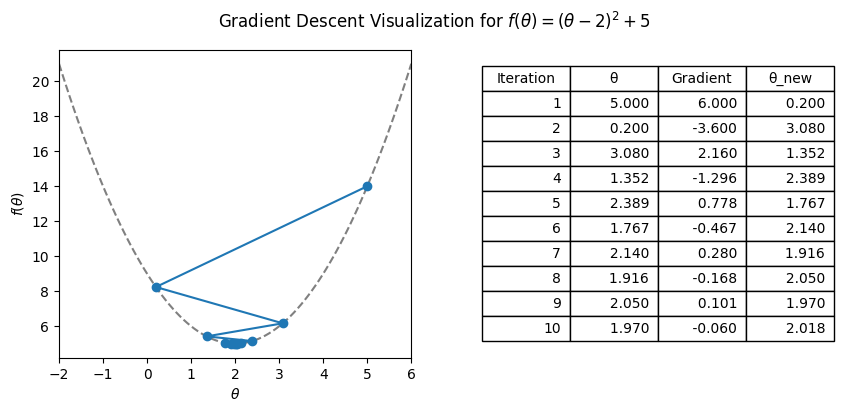

In [279]:
gradient_decent(f = f_np, x0 = 5, learning_rate=0.8, n_iter=10)

<p style="text-decoration: underline" id='1-4'>(Gradient descent) Lab-Question 4:</p>

*Replace the analytical gradient by a two-sided numerical approximation. This is often necessary in practice when the analytical gradient is hard to compute. Use a two-sided approximation such that $$\hat{g}(\theta)=\frac{f(\theta + h)-f(\theta - h)}{2h}$$ Repeat part 3 using the numerical gradient.*

---

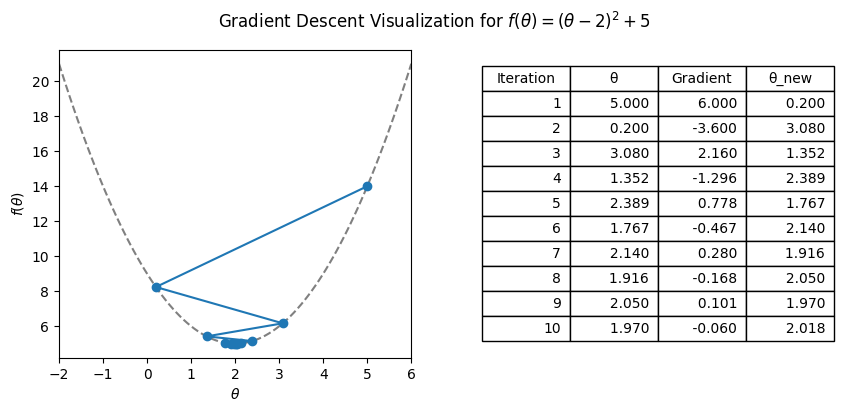

In [277]:
gradient_decent(f = f_np, x0 = 5, learning_rate=0.8, n_iter=10, approx=True)

---

<a id='ordinary-least-squares'></a> <p style="text-decoration: underline; font-style: italic; font-size:24px">Problem Definition 2: Ordinary least squares</p>

In this part, we will use gradient descent to find coefficient estimates in a simple linear regression. Our model is $$y_{i}=\beta_{0}+\beta_{1}x_{1}+u_{i}$$ and we are interested in minimizing the average loss over a sample of observations $$\min_{\beta_{0}, \beta_{1}}\frac{1}{N}\sum_{i=1}^N L(\beta_{0}, \beta_{1};y_{i},x_{i})$$ with the loss function being the squared error. $$L(\beta_{0}, \beta_{1};y_{i},x_{i}) = (y_{i} - (\beta_{0}+\beta_{1}x_{1}))^2$$ We work with data from [Kiva](https://www.kiva.org/), a large provider of microcredit in developing countries. On their website, a
potential borrower can upload a loan proposal, and creditors can chip in until the requested loan amount
is reached, i.e. an initial loan request of, say 200 USD, will be split among, say 10 creditors, not necessarily
with equal contributions. Load the dataset Lab2_Optimization.csv into Python.

We are interested in the time it takes to fund a loan proposal as a function of the requested loan amount.$$TimeToFund_{i}=β_{0}+β_{1}LoanAmount_{i}+ϵ_{i}$$


<p style="text-decoration: underline" id='2-1'>(Ordinary least squares) Lab-Question 1:</p>

*Plot LoanAmount against TimeToFund to get a sense of the relationship between these two variables.*

---

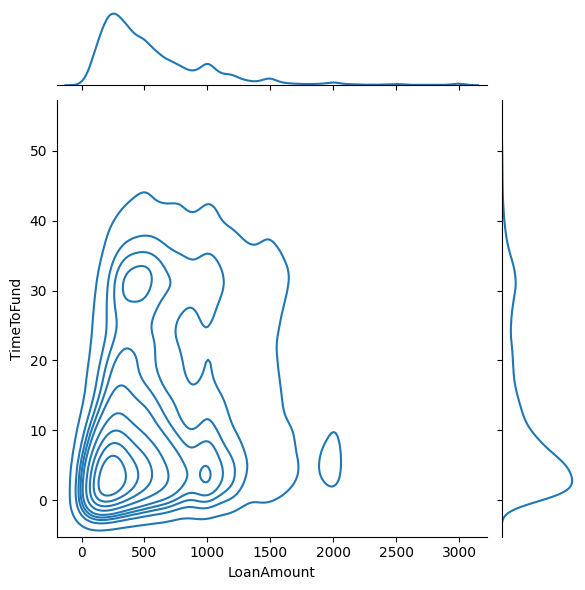

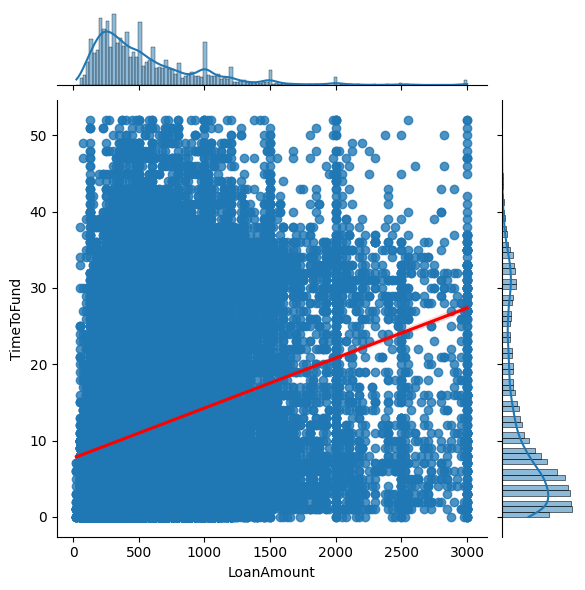

In [328]:
import seaborn as sns 

data = pd.read_csv("data\Lab2_Optimization.csv", sep=";", index_col='id')

sns.jointplot(data, x="LoanAmount", y="TimeToFund", kind="kde")
sns.jointplot(data, x="LoanAmount", y="TimeToFund", kind="reg", marker="+", s=100, joint_kws={'line_kws':{'color':'red'}})
plt.show()

<p style="text-decoration: underline" id='2-2'>(Ordinary least squares) Lab-Question 2:</p>

*Even though we know how to solve OLS in closed form, we want to use gradient descent to find the coefficients. The objective function can be defined as*
```python
# Define objective function
def mse(beta0, beta1, y, X):
    return sum((y - beta0 - beta1*X)**2) / len(y)
```
*Plot the objective function (average loss) as a function of $β_{1} ∈ [0, 0.01]$, keeping $β_{0}$ fixed at 7.*

--- 

Answer:

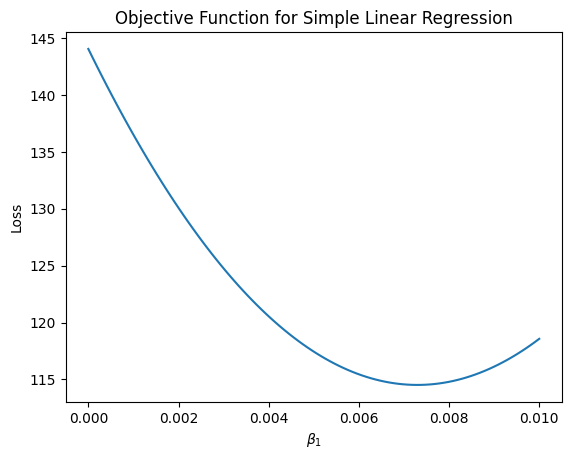

In [323]:
# extract the relevant variables
y = data['TimeToFund']
X = data['LoanAmount']

# set beta0 to 7
beta0 = 7

# define the objective function (average loss)
def mse(beta0, beta1, y, X):
    return sum((y - beta0 - beta1*X)**2) / len(y)

# create a range of values for beta1
beta1_vals = np.linspace(0, 0.01, 100)

# calculate the objective function for each value of beta1
loss_vals = [mse(beta0, beta1, y, X) for beta1 in beta1_vals]

# plot the objective function
plt.plot(beta1_vals, loss_vals)
plt.xlabel(r'$\beta_1$')
plt.ylabel('Loss')
plt.title('Objective Function for Simple Linear Regression')
plt.show()

<p style="text-decoration: underline" id='2-3'>(Ordinary least squares) Lab-Question 3:</p>

*What’s the analytical gradient of the objective function? Define a function that computes the gradient for given $β_{0}, β_{1}$.*

--- 

Answer:

The analytical gradient of the objective function is the partial derivative of the function with respect to each coefficient. For this problem, the objective function is the mean squared error (MSE): $$MSE(β_{0}, β_{1}) = \frac{1}{N}Σ(y_{i} - (β_{0} + β_{1}x_{i}))^2$$ To compute the partial derivative of MSE with respect to $β_{0}$, we can use the chain rule and get $$\frac{∂MSE}{∂β_{0}} = \frac{-2}{N}Σ(y_{i} - (β_{0} + β_{1}x_{i}))$$

To compute the partial derivative of MSE with respect to $β_{1}$, we can also use the chain rule and get:

$$\frac{∂MSE}{∂β_{1}} = \frac{-2}{N}Σ(x_{i} (y_{i} - (β_{0} + β_{1}x_{i})))$$

Therefore, the analytical gradient of the objective function is:

$$[\frac{∂MSE}{∂β_{0}}, \frac{∂MSE}{∂β_{1}}] = [\frac{-2}{N}Σ(y_{i} - (β_{0} + β_{1}x_{i})), \frac{-2}{N}Σ(x_{i} (y_{i} - (β_{0} + β_{1}x_{i})))]$$

We can define a function in Python to compute the gradient as follows:

In [325]:
def mse_gradient(beta0, beta1, y, X):
    N = len(y)
    grad_beta0 = -2/N * sum(y - beta0 - beta1*X)
    grad_beta1 = -2/N * sum(X * (y - beta0 - beta1*X))
    return (grad_beta0, grad_beta1)

In [329]:
# example
mse_gradient(7, 0.006, y,X)

(-2.0613666651349476, -1438.6418363126695)

<p style="text-decoration: underline" id='2-4'>(Ordinary least squares) Lab-Question 4:</p>

*Use the gradient from [3](#2-3). to optimize the MSE via gradient descent, starting at $β_0 = 5$ and $β_1 = .005$. Use a learning rate of $λ = .0001$ and $1000$ iterations. Why does the algorithm yield NaNs for $β_0$ and $β_1$?*

--- 

Answer:

In [335]:
def gd(X,y,beta0null, beta1null, _lambda, tousand=False):
    if tousand: 
        X = X/1000
        
    beta0_2 = [beta0null]
    beta1_2 = [beta1null]

    for i in range(1000):
        beta0_2.append(beta0_2[i] - _lambda * ((-2/len(y)) * (sum(y - beta0_2[i] - beta1_2[i] * X))))
        beta1_2.append(beta1_2[i] - _lambda * ((-2/len(y)) * (sum(X * (y - beta0_2[i] - beta1_2[i] * X)))))
    df = pd.DataFrame({'beta0_2': beta0_2, 'beta1_2': beta1_2})
    return df

gd(X,y,beta0null=5, beta1null=0.005, _lambda = 0.0001)

,beta0_2,beta1_2
0,5.000000,0.005000
1,5.000722,0.491902
2,4.944932,-53.021534
3,11.100237,5828.423843
4,-665.380926,-640577.466886
...,...,...
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN
999,NaN,NaN


The values diverge at some point. Generally, this could mean that our learning rate lamda is too big. Since this is not probably not the case here, feature scaling could be problem.

<p style="text-decoration: underline" id='2-5'>(Ordinary least squares) Lab-Question 5:</p>

*Does it help to change the learning rate?*

--- 

Answer:

In [336]:
gd(X,y,beta0null=5, beta1null=0.005, _lambda=0.1)

,beta0_2,beta1_2
0,5.000000e+00,5.000000e-03
1,5.722203e+00,4.869068e+02
2,-5.650640e+04,-5.399936e+07
3,6.267439e+09,5.988797e+12
4,-6.950901e+14,-6.641873e+17
...,...,...
996,NaN,NaN
997,NaN,NaN
998,NaN,NaN
999,NaN,NaN


As we can see, the parameters are diverging again even if we choose a significantly higher learning rate. This supports the assumption that feature scaling is the actual problem instead of misspecified learning rate.

<p style="text-decoration: underline" id='2-6'>(Ordinary least squares) Lab-Question 6:</p>

*What happens when we express LoanAmount in $1000USD$ terms rather than in raw dollar terms? Try a learning rate of $λ ∈ {.1, .01}$.*

--- 

Answer:

In [339]:
gd(X,y,beta0null=5, beta1null=0.005, _lambda=0.1, tousand=True)

,beta0_2,beta1_2
0,5.000000,0.005000
1,6.301952,1.045876
2,7.222703,1.820201
3,7.869431,2.401782
4,8.319312,2.843798
...,...,...
996,7.707706,6.556541
997,7.707706,6.556541
998,7.707706,6.556541
999,7.707706,6.556541


In [340]:
gd(X,y,beta0null=5, beta1null=0.005, _lambda=0.01, tousand=True)

,beta0_2,beta1_2
0,5.000000,0.005000
1,5.130195,0.109088
2,5.256578,0.210510
3,5.379257,0.309340
4,5.498334,0.405651
...,...,...
996,7.805795,6.413829
997,7.805489,6.414273
998,7.805185,6.414716
999,7.804882,6.415157


After rescaling the feature we see convergence. The results are equal to the results of closed-form OLS estimates (adjusted for the rescaled inputs).

<p style="text-decoration: underline" id='2-7'>(Ordinary least squares) Lab-Question 7:</p>

*How would you adjust your code to do stochastic gradient descent instead?*

--- 

Answer:

In [362]:
def sgd(data,beta0null, beta1null, _lambda, tousand=False):
    y = data['TimeToFund']
    X = data['LoanAmount']
    
    if tousand: 
        data['LoanAmount'] = data['LoanAmount']/1000
        
    beta0_2 = [beta0null]
    beta1_2 = [beta1null]

    for i in range(1000):
        sample = data.sample(n=1000)
        y_i = sample['TimeToFund']
        X_i = sample['LoanAmount']
        beta0_2.append(beta0_2[i] - _lambda * ((-2/len(y_i)) * (sum(y_i - beta0_2[i] - beta1_2[i] * X_i))))
        beta1_2.append(beta1_2[i] - _lambda * ((-2/len(y_i)) * (sum(X_i * (y_i - beta0_2[i] - beta1_2[i] * X_i)))))
    df = pd.DataFrame({'beta0_2': beta0_2, 'beta1_2': beta1_2})
    return df

In [363]:
sgd(data,beta0null=5, beta1null=0.005, _lambda=0.01, tousand=True)

,beta0_2,beta1_2
0,5.000000,0.005000
1,5.134962,0.107865
2,5.273643,0.222130
3,5.385067,0.313235
4,5.499750,0.405091
...,...,...
996,7.807536,6.374943
997,7.797306,6.367065
998,7.794095,6.362495
999,7.795826,6.368043


For running stochastic gradient descent we need to draw a sample from our original data set. With this smaller subset a solution is derived in less time which can be important in case of bigger data sets with more parameters. Depending on the sample a solution might be less accurate, though.